# Omar Díaz Landa
# 114041

### Ejemplo paridad

Dados n bits de entrada contar el número de 1's en la cadena. Si el número es impar la salida es 1, si el número es par la salida es 0.

In [107]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer

import pandas as pd
import numpy as np
import random as rd
import math as mt
import sklearn.metrics as sk
import matplotlib.pyplot as plt
%matplotlib inline

Funciones auxiliares

In [2]:
def get_y(df):
    y = df.iloc[:,(df.shape[1]-1)]
    return y



def get_xs(df):
    df = df.iloc[:,0:(df.shape[1]-1)]
    return df



def add_x0(df):
    x0 = [1 for i in range(0,len(df))]
    x0 = pd.Series(x0)

    df['x0'] = x0
    return df



def initializeWs(df):
    w = [rd.random() for i in range(df.shape[1])]
  
    #print len(w)
    return w


Ejemplos de paridad

In [16]:
d = {'x1':[0,1,1,0,1,1], 'x2': [0,0,1,0,1,0], 'x3': [0,0,0,1,1,1], 'x4':[0,1,0,0,1,0], 'x5':[0,0,0,0,1,1], 'x6':[1,1,0,1,1,0]}
df = pd.DataFrame(d)
y = [1,1,0,0,0,1]

#df_aux = add_x0(df)
dic = {#'x0': df_aux.loc[:,'x0'], 
       'x1': df.loc[:,"x1"],
       'x2': df.loc[:,"x2"],
       'x3': df.loc[:,"x3"],
       'x4': df.loc[:,"x4"],
       'x5': df.loc[:,"x5"],
       'x6': df.loc[:,"x6"]}
df = pd.DataFrame(dic)
df

,x1,x2,x3,x4,x5,x6
0,0,0,0,0,0,1
1,1,0,0,1,0,1
2,1,1,0,0,0,0
3,0,0,1,0,0,1
4,1,1,1,1,1,1
5,1,0,1,0,1,0


### Definiendo topología de la red

In [17]:
y_dic = {'y': y}
df_y = pd.DataFrame(y_dic)
df_y

,y
0,1
1,1
2,0
3,0
4,0
5,1


In [18]:
#numero de entradas, numero de capas intermedias, numero de salidas
net=buildNetwork(df.shape[1],4,1)
print net

FeedForwardNetwork-17
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <SigmoidLayer 'hidden0'>, <LinearLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-13': 'in' -> 'hidden0'>, <FullConnection 'FullConnection-14': 'hidden0' -> 'out'>, <FullConnection 'FullConnection-15': 'bias' -> 'out'>, <FullConnection 'FullConnection-16': 'bias' -> 'hidden0'>]



In [19]:
#numero de variables diferentes, numero de valores diferentes de salida
ds = SupervisedDataSet(df.shape[0], len(y))
ds.setField('input',df)
ds.setField('target',df_y)

### Entrenar la red

In [20]:
trainer = BackpropTrainer(net,ds)

In [21]:
for i in range(1000):
    trainer.train()

In [23]:
net.activate([1,1,0,0,1,1])

array([ 0.62910564])

## XOR 

In [220]:
x1 = []
x2 = []
for i in range(500):
    a=rd.random()
    b=rd.random()
    x1.append(a)
    x2.append(b)


In [221]:
d = {'x1':x1, 'x2': x2}
df = pd.DataFrame(d)

#df_aux = add_x0(df)
dic = {#'x0': df_aux.loc[:,'x0'], 
       'x1': df.loc[:,"x1"],
       'x2': df.loc[:,"x2"]}
df = pd.DataFrame(dic)
df.head()

,x1,x2
0,0.969988,0.360282
1,0.980365,0.606869
2,0.259565,0.294639
3,0.159973,0.505131
4,0.576484,0.172771


In [223]:
y = []
for i in range(len(x1)):
    if x1[i] <= 0.5 and x2[i] <= 0.5:
        y.append(0)
    elif x1[i] > 0.5 and x2[i] <= 0.5:
        y.append(1)
    elif x1[i] <= 0.5 and x2[i] > 0.5:
        y.append(1)
    elif x1[i] > 0.5 and x2[i] > 0.5:
        y.append(0)

y_dic = {'y': y}
df_y = pd.DataFrame(y_dic)
df_y.head()

,y
0,1
1,0
2,0
3,1
4,1


In [224]:
net=buildNetwork(df.shape[1],4,1)
print net

FeedForwardNetwork-116
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <SigmoidLayer 'hidden0'>, <LinearLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-112': 'in' -> 'hidden0'>, <FullConnection 'FullConnection-113': 'hidden0' -> 'out'>, <FullConnection 'FullConnection-114': 'bias' -> 'out'>, <FullConnection 'FullConnection-115': 'bias' -> 'hidden0'>]



In [225]:
ds = SupervisedDataSet(df.shape[0], len(y))
ds.setField('input',df)
ds.setField('target',df_y)

In [226]:
trainer = BackpropTrainer(net,ds)

In [227]:
for i in range(1000):
    trainer.train()

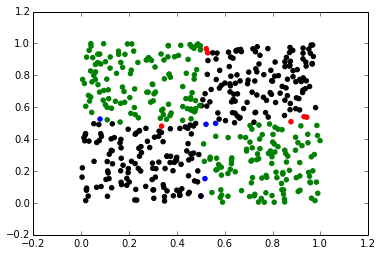

In [228]:
input_data = []
output_data_binary = []
output_data_float = []

for i in range(500):
    x=rd.random()
    y=rd.random()
    input_data.append([x,y])
    
    output = net.activate([x,y])
    output_data_float.append(output)
    
    #tp
    if (output > 0.5 and x <= 0.5 and y > 0.5) or (output > 0.5 and x > 0.5 and y <= 0.5):
        col = "green"
        output_data_binary.append(1)
    #tn
    elif (output < 0.5 and x <= 0.5 and y <= 0.5) or (output < 0.5 and x > 0.5 and y > 0.5):
        col = "black"
        output_data_binary.append(0)
    #fp
    elif (output > 0.5 and x <= 0.5 and y <= 0.5) or (output > 0.5 and x > 0.5 and y > 0.5):
        col = "red"
        output_data_binary.append(0)
    #fn
    elif (output < 0.5 and x <= 0.5 and y > 0.5) or (output < 0.5 and x > 0.5 and y <= 0.5):
        col = "blue"
        output_data_binary.append(0)
    plt.scatter(x,y, color=col)

### Matriz de confusion

In [229]:
y_real = []
for i in range(len(input_data)):
    if (input_data[i][0] <= 0.5 and input_data[i][1] <= 0.5) or (input_data[i][0] > 0.5 and input_data[i][0] > 0.5):
        y_real.append(0)
    else:
        y_real.append(1)

y_predicted = output_data_binary

sk.confusion_matrix(y_real, y_predicted)

array([[263, 112],
       [  1, 124]])

#### Curva ROC

In [230]:
y_predicted = output_data_float
fpr, tpr, thresholds = sk.roc_curve(y_real, y_predicted, pos_label=1)
roc_auc = sk.auc(fpr, tpr)

#area bajo la curva
roc_auc

0.84089599999999987

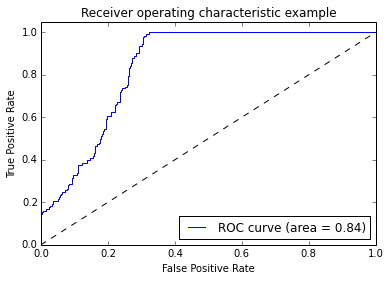

In [231]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Círculo

In [168]:
#generar datos 
x1 = []
x2 = []
y = []
r = 1
for i in range(250):
    a=rd.uniform(-2,2)
    b=rd.uniform(-2,2)
    x1.append(a)
    x2.append(b)
    if mt.sqrt(a**2 + b**2) <= r**2:
        output = 1
    else: 
        output = 0
    
    y.append(output)

In [169]:
x1[0:5]

[-1.8883345481100964,
 -0.6005952686803786,
 1.7187272862116258,
 -0.6423588853370181,
 -0.5593313473532286]

In [170]:
x2[0:5]

[0.09087554560437461,
 0.8087897748944095,
 -0.39466719259161875,
 -1.5610173376007763,
 -0.7166746024443946]

In [171]:
y[0:5]

[0, 0, 0, 0, 1]

#### Graficamos los datos:

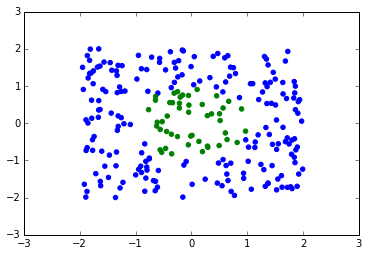

In [172]:
for i in range(len(x1)):
    if y[i] == 1:
        col= "green"
    else:
        col="blue"
    plt.scatter(x1[i],x2[i], color=col)

Convertimos a data frame

In [173]:
d = {'x1':x1, 'x2': x2}
df = pd.DataFrame(d)

#df_aux = add_x0(df)
dic = {#'x0': df_aux.loc[:,'x0'], 
       'x1': df.loc[:,"x1"],
       'x2': df.loc[:,"x2"]}
df = pd.DataFrame(dic)
df.head()

,x1,x2
0,-1.888335,0.090876
1,-0.600595,0.808790
2,1.718727,-0.394667
3,-0.642359,-1.561017
4,-0.559331,-0.716675


In [174]:
y_dic = {'y': y}
df_y = pd.DataFrame(y_dic)
df_y.head()

,y
0,0
1,0
2,0
3,0
4,1


### Entrenamos la red

In [175]:
net=buildNetwork(df.shape[1],3,1)
print net

FeedForwardNetwork-62
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <SigmoidLayer 'hidden0'>, <LinearLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-58': 'in' -> 'hidden0'>, <FullConnection 'FullConnection-59': 'hidden0' -> 'out'>, <FullConnection 'FullConnection-60': 'bias' -> 'out'>, <FullConnection 'FullConnection-61': 'bias' -> 'hidden0'>]



In [176]:
ds = SupervisedDataSet(df.shape[0], len(y))
ds.setField('input',df)
ds.setField('target',df_y)

In [177]:
trainer = BackpropTrainer(net,ds)

In [178]:
for i in range(1000):
    trainer.train()

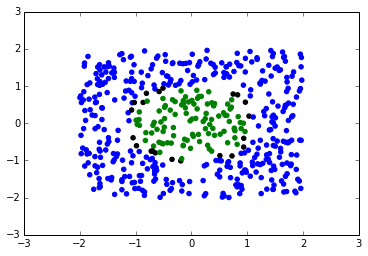

In [179]:
#tp: verde, fp:rojo, tn:azul, fn:negro
#cayó dentro del circulo = 1
#plt.axis([-2, 2, -2, 2])

input_data = []
output_data_float = []
output_data_binary = []

for i in range(500):
    x1=rd.uniform(-2,2)
    x2=rd.uniform(-2,2)
    input_data.append(x1**2+x2**2)
    
    output = net.activate([x1**2,x2**2])
    output_data_float.append(output[0])
    
    #tp
    if output > 0.5 and mt.sqrt(x1**2 + x2**2) <= r**2:
        col = "green"
        output_data_binary.append(1)
    #fn    
    elif output > 0.5 and mt.sqrt(x1**2 + x2**2) > r**2 :
        col = "black"
        output_data_binary.append(0)
    #fp
    elif output <= 0.5 and mt.sqrt(x1**2 + x2**2) <= r**2:
        col = "red"
        output_data_binary.append(0)
    #tn    
    elif output <= 0.5 and mt.sqrt(x1**2 + x2**2) > r**2:
        col = "blue"
        output_data_binary.append(0)
    plt.scatter(x1,x2, color=col)

### Matriz de confusión

In [180]:
y_real = []
for i in range(len(input_data)):
    if mt.sqrt(input_data[i]) <= r**2:
        y_real.append(1)
    else:
        y_real.append(0)

y_predicted = output_data_binary

sk.confusion_matrix(y_real, y_predicted)

array([[399,   0],
       [  0, 101]])

#### Curva ROC

In [181]:
y_predicted = output_data_float
fpr, tpr, thresholds = sk.roc_curve(y_real, y_predicted, pos_label=1)
roc_auc = sk.auc(fpr, tpr)

#area bajo la curva
roc_auc

0.99952852428099948

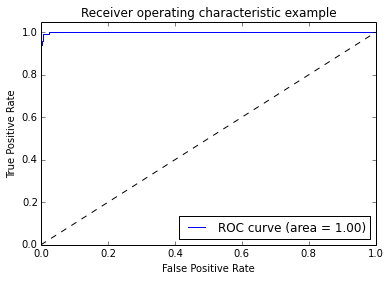

In [182]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()